# Euchre

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

sys.path.insert(0, 'C:/Users/jerem/Desktop/nonsense/euchre/')

from utils import EuchreGame

### Create Game object, check attributes

In [2]:
euchre_game = EuchreGame()

In [3]:
# create show_all_game_attributes method?
euchre_game.score

{'t1': 0, 't2': 0}

In [4]:
euchre_game.dealer

'p1'

In [5]:
euchre_game.next_to_deal

['p2', 'p3', 'p4', 'p1']

In [6]:
euchre_game.tm_call_trump_strategy

{'t1': None, 't2': None}

In [7]:
euchre_game.tm_play_card_strategy

{'t1': None, 't2': None}

### Deal cards

In [8]:
deck_of_cards = euchre_game.shuffle_deck_of_cards()
for card in deck_of_cards:
    print(card, end=',')

9_S,9_C,9_H,9_D,T_S,T_C,T_H,T_D,J_S,J_C,J_H,J_D,Q_S,Q_C,Q_H,Q_D,K_S,K_C,K_H,K_D,A_S,A_C,A_H,A_D,

In [9]:
player_hands, card_flipped_up = euchre_game.deal_hand()

In [10]:
player_hands

{'p1': ['Q_S', 'Q_H', 'K_H', 'K_S', 'Q_D'],
 'p2': ['9_S', 'T_C', 'J_C', 'K_C', 'T_S'],
 'p3': ['J_H', '9_H', 'A_S', 'Q_C', 'J_S'],
 'p4': ['J_D', '9_D', 'T_H', 'T_D', '9_C']}

In [11]:
card_flipped_up

'K_D'

### Choose suit for trump

In [12]:
if euchre_game.eval_flipped_card(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                                 player='p1', 
                                 card_flipped_up='A_S'):
    print('order up trump')

In [13]:
if euchre_game.eval_flipped_card(hand=['K_S', 'A_H', 'A_S', 'J_C', 'J_S'], 
                                 player='p2', 
                                 card_flipped_up='A_S'):
    print('order up trump')

order up trump


In [14]:
euchre_game.choose_open_trump(hand=['K_S', 'A_S', 'A_C', 'J_C', 'J_S'], 
                              player='p2', 
                              card_flipped_up='A_D')

'S'

In [15]:
euchre_game.choose_open_trump(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                              player='p2', 
                              card_flipped_up='T_S')

In [16]:
calling_player, trump = euchre_game.determine_trump(card_flipped_up=card_flipped_up,
                           player_hands=player_hands)

In [17]:
print(player_hands)
print(calling_player)
print(trump)

{'p1': ['Q_S', 'Q_H', 'K_H', 'K_S', 'Q_D'], 'p2': ['9_S', 'T_C', 'J_C', 'K_C', 'T_S'], 'p3': ['J_H', '9_H', 'A_S', 'Q_C', 'J_S'], 'p4': ['J_D', '9_D', 'T_H', 'T_D', '9_C']}
p4
D


### Play trick

In [18]:
cards_in_play, player_led = euchre_game.play_trick(player_hands=player_hands, 
                                                   trump='H', 
                                                   next_to_play_list=euchre_game.next_to_deal, 
                                                   cards_played_this_hand = [], 
                                                   unplayed_trump_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'],
                                                   verbose=True)

Leading with highest non-trump- Player p2 plays K_C, Current winning player p2
Following suit with lowest non-trump card- Player p3 plays Q_C, Current winning player p2
Teammate winning, following suit w/ lowest card- Player p4 plays 9_C, Current winning player p2
Lowest trump card- Player p1 plays Q_H, 

In [19]:
cards_in_play

{'p2': 'K_C', 'p3': 'Q_C', 'p4': '9_C', 'p1': 'Q_H'}

In [20]:
player_led

'p2'

#### Determine trick winner

In [21]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_H', 'p1': 'A_S'}, 
                           trump='S', 
                           player_led=player_led, 
                                   verbose=True)

p3 wins trick


'p3'

In [22]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_S', 'p1': 'A_S'}, 
                           trump='D', 
                           player_led=player_led, 
                                   verbose=False)

'p1'

In [23]:
trick_winner = euchre_game.determine_trick_winner(cards_in_play=cards_in_play,
                                           trump='H',
                                           player_led=player_led)

trick_winner

'p1'

In [24]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_H', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [25]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p1'

In [26]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [27]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p2'

#### Swap card in dealer hand

In [190]:
euchre_game.swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['J_C', 'A_D', 'K_H', 'K_S', 'J_D'], 
                 verbose=True)

Dealer discards K_H and picks up A_S


['J_C', 'A_D', 'K_S', 'J_D', 'A_S']

In [191]:
euchre_game.swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['J_H', 'A_D', 'K_H', 'K_S', 'T_D'], 
                 verbose=True)

Dealer discards T_D and picks up A_S


['J_H', 'A_D', 'K_H', 'K_S', 'A_S']

In [192]:
euchre_game.swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['9_H', 'T_H', 'K_H', 'Q_H', 'A_D'], 
                 verbose=True)

Dealer discards A_D and picks up A_S


['9_H', 'T_H', 'K_H', 'Q_H', 'A_S']

In [193]:
euchre_game.swap_dealer_card(card_flipped_up='J_S', 
                 dealer_hand=['9_S', 'A_S', 'Q_S', 'K_S', 'T_S'], 
                 verbose=True)

Dealer discards 9_S and picks up J_S


['A_S', 'Q_S', 'K_S', 'T_S', 'J_S']

### Play card

In [46]:
euchre_game.play_card(player='p4',
                      hand=['J_H', 'A_C', '9_H', 'K_S', 'J_D'], 
                      trump='S',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D', verbose=True)

Current winning player p3
Following suit with lowest non-trump card- 

'J_D'

In [45]:
euchre_game.play_card(player='p4',
                      hand=['J_H', 'A_C', '9_H', 'K_S', 'J_D'], 
                      trump='D',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D', 
                      verbose=True)

Current winning player p2
Teammate winning, following suit w/ lowest trump card- 

'J_H'

#### Play lead card

In [47]:
euchre_game.play_lead_card(hand=['9_D', 'T_C', '9_C', 'A_S', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'A_S'

In [48]:
euchre_game.play_lead_card(hand=['T_D', 'T_C', 'Q_C', 'A_D', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'A_D'

#### Play random card

In [49]:
from utils import play_random_card

In [50]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led=None)

'9_D'

In [51]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led='D')

'9_D'

In [56]:
from utils import get_lowest_card

In [57]:
get_lowest_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'])

'9_D'

In [58]:
get_lowest_card(hand=['T_D', 'T_C', 'T_H', 'J_S', 'A_C'])

'T_D'

In [59]:
from utils import get_lowest_trump_card

In [60]:
get_lowest_trump_card(hand=['J_H', 'J_D'], trump='H')

'J_D'

In [61]:
get_lowest_trump_card(hand=['J_H', 'J_D'], trump='C')

In [62]:
get_lowest_trump_card(hand=['J_H', 'J_S', 'A_C'], trump='C')

'A_C'

In [ ]:
from utils import get_lowest_nontrump_card_in_suit

In [63]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H'], suit='H')

'Q_H'

In [64]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H'], suit='S')

In [65]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H', 'J_H'], suit='H')

'J_H'

In [66]:
from utils import get_highest_nontrump_card

In [67]:
get_highest_nontrump_card(hand=['A_H'], trump='H')

In [68]:
get_highest_nontrump_card(hand=['A_H', 'A_D', 'A_S'], trump='H')

'A_D'

In [69]:
get_highest_nontrump_card(hand=['T_H', '9_D', 'A_S'], trump='S')

'T_H'

In [ ]:
from utils import find_highest_remaining_trump

In [ ]:
find_highest_remaining_trump(trump='D', 
                             cards_played_this_hand=[], 
                             verbose=True)

In [ ]:
find_highest_remaining_trump(trump='H', 
                             cards_played_this_hand=['J_H', 'J_D', 'A_H'], 
                             verbose=True)

In [ ]:
find_highest_remaining_trump(trump='H', 
                             cards_played_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'], 
                             verbose=True)

In [ ]:
find_highest_remaining_trump(trump='H', 
                             cards_played_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'], 
                             verbose=True)

In [70]:
unplayed_trump = ['J_D', 'J_H', 'A_D', 'K_D', 'Q_D', 'T_D', '9_D']

In [71]:
unplayed_trump.remove('J_H')

In [73]:
unplayed_trump[0]

'J_D'

In [74]:
unplayed_trump.remove('J_D')

In [75]:
unplayed_trump

['A_D', 'K_D', 'Q_D', 'T_D', '9_D']

### Play full game

In [197]:
%%time

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=True)

Hand #0- Dealer: p1; Player Hands: {'p1': ['T_D', 'J_S', 'T_S', '9_S', '9_C'], 'p2': ['J_C', 'K_S', 'Q_D', 'J_H', 'K_D'], 'p3': ['K_H', '9_D', 'T_H', 'Q_H', 'A_S'], 'p4': ['Q_S', 'K_C', 'J_D', 'T_C', '9_H']}
Card flipped up: Q_C
Player p3 has chosen H as trump
Trick 0: Leading with highest trump card remaining- Trump cards remaining ['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H']- Player p2 plays J_H, Current winning player p2
Following suit with lowest trump card- Player p3 plays T_H, Current winning player p2
Teammate winning, following suit w/ lowest trump card- Player p4 plays 9_H, Current winning player p2
No trump, playing lowest card in hand- Player p1 plays 9_S, p2 wins trick
Trick 1: Leading with highest non-trump- Player p2 plays K_S, Current winning player p2
Following suit with lowest non-trump card- Player p3 plays A_S, Current winning player p3
Following suit with lowest non-trump card- Player p4 plays Q_S, Current winning player p3
Teammate winning, following suit w/ l

In [91]:
euchre_game.score

{'t1': 8, 't2': 11}

#### Profile performance

In [93]:
%%prun

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=False)

### Loop through games played, collect strategy results

In [94]:
from scipy.stats import ttest_ind

In [97]:
%%time

N_GAMES_TO_PLAY = 1000

strategy_results = {'t1_wins':0, 't1_scores':[], 't2_scores':[]}

for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    # euchre_game.tm_call_trump_strategy['t1'] = 'NEW'  # set team 2 call trump strategy to NEW
    # euchre_game.tm_call_trump_strategy['t2'] = 'always'  # set team 2 call trump strategy to always
    euchre_game.tm_play_card_strategy['t2'] = 'random'  # set team 2 play card strategy to random
    euchre_game.play_full_game(verbose=False)
    if euchre_game.score['t1'] > euchre_game.score['t2']:
        strategy_results['t1_wins'] += 1
    strategy_results['t1_scores'].append(euchre_game.score['t1'])
    strategy_results['t2_scores'].append(euchre_game.score['t2'])

Wall time: 6.85 s


In [98]:
print(f"""Team 1 strategy won {strategy_results['t1_wins']}/{N_GAMES_TO_PLAY} games \
({strategy_results['t1_wins']/N_GAMES_TO_PLAY*100}%)""")

Team 1 strategy won 686/1000 games (68.60000000000001%)


#### T-test for statistically significant difference in means between t1 and t2 scores

In [99]:
ttest_ind(strategy_results['t1_scores'], strategy_results['t2_scores'])

Ttest_indResult(statistic=17.331214290220757, pvalue=8.476446967081405e-63)

### Plot results

In [100]:
import matplotlib.pyplot as plt

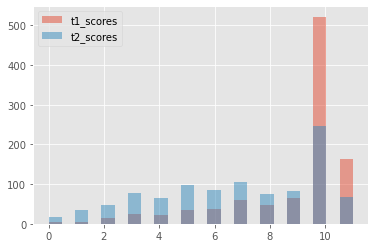

In [101]:
plt.style.use('ggplot')
plt.hist(strategy_results['t1_scores'], bins=23, alpha=0.5, label='t1_scores')
plt.hist(strategy_results['t2_scores'], bins=23, alpha=0.5, label='t2_scores')
plt.legend(loc='upper left')

## Loop through games played, collect hand_results

In [102]:
euchre_game = EuchreGame()
hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
hand_results[0]

{'player_hands': {'p1': ['J_S', '9_S', 'T_D', 'K_H', '9_H'],
  'p2': ['Q_H', 'T_H', 'Q_D', 'Q_C', 'J_H'],
  'p3': ['T_S', 'T_C', 'J_C', 'K_S', 'A_S'],
  'p4': ['Q_S', 'K_D', 'K_C', '9_C', '9_D']},
 'calling_player': 'p2',
 'trump': 'H',
 'dealer': 'p1',
 'hand_score': {'t1': 0, 't2': 1},
 'trick_winners': {'p2': 3, 'p3': 0, 'p4': 0, 'p1': 2}}

In [200]:
import pandas as pd

In [212]:
euchre_game.get_next_trick_order('p1')

['p1', 'p2', 'p3', 'p4']

In [201]:
from utils import return_off_suit, get_teammate

In [204]:
# TODO: add number of suits

def return_df_from_hand_results(hand_results_dict):
    fields_to_collect = ['tricks_won',
                         'is_calling_player',
                         'teammate_called',
                         'has_right', 
                         'has_left',
                         'has_Atrump',
                         'has_Ktrump',
                         'has_Qtrump',
                         'has_Ttrump',
                         'has_9trump',
                         'num_off_A',
                         'num_off_K',
                         'num_off_Q']
    results_list = []
    for player in hand_results_dict['trick_winners'].keys():
        player_hand_results = dict.fromkeys(fields_to_collect,0)
        player_hand_results['tricks_won'] = hand_results_dict['trick_winners'][player]
        player_hand_results['partner_tricks'] = hand_results_dict['trick_winners'][get_teammate(player)]
        if player == hand_results_dict['calling_player']:
            player_hand_results['is_calling_player'] = 1
        if get_teammate(player) == hand_results_dict['calling_player']:
            player_hand_results['teammate_called'] = 1
        for idx, card in enumerate(hand_results_dict['player_hands'][player]):
            if card[-1] == hand_results_dict['trump']:
                if card[0] == 'A':
                    player_hand_results['has_Atrump'] = 1
                if card[0] == 'K':
                    player_hand_results['has_Ktrump'] = 1
                if card[0] == 'Q':
                    player_hand_results['has_Qtrump'] = 1
                if card[0] == 'J':
                    player_hand_results['has_right'] = 1
                if card[0] == 'T':
                    player_hand_results['has_Ttrump'] = 1
                if card[0] == '9':
                    player_hand_results['has_9trump'] = 1
            else:
                if card[0] == 'A':
                    player_hand_results['num_off_A'] += 1
                if card[0] == 'K':
                    player_hand_results['num_off_K'] += 1
                if card[0] == 'Q':
                    player_hand_results['num_off_Q'] += 1
                if card[0] == 'J':
                    if return_off_suit(card[-1]) == hand_results_dict['trump']:
                        player_hand_results['has_left'] = 1
        results_list.append(player_hand_results)
    return pd.DataFrame(results_list)

In [205]:
%%time

N_GAMES_TO_PLAY = 100

all_hand_results_df = pd.DataFrame()
for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
    game_results_df = pd.DataFrame()
    for hand in hand_results:
        hand_results_df = return_df_from_hand_results(hand)
        game_results_df = pd.concat([game_results_df, hand_results_df])
    all_hand_results_df = pd.concat([all_hand_results_df, game_results_df])

Wall time: 2.26 s


In [206]:
all_hand_results_df.shape

(4704, 14)

In [207]:
all_hand_results_df.sort_values('tricks_won', ascending=False).head(10)

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,partner_tricks
1,5,1,0,1,0,0,0,1,0,1,0,1,1,0
3,5,1,0,1,0,1,0,1,1,0,0,1,0,0
3,5,1,0,1,0,0,1,0,1,0,0,1,1,0
1,5,1,0,1,1,0,0,1,0,1,0,1,0,0
3,5,1,0,1,1,0,1,1,0,0,0,1,0,0
0,5,1,0,1,0,0,1,1,0,0,0,1,1,0
3,5,1,0,0,0,0,1,0,1,0,1,0,1,0
0,5,1,0,1,0,0,1,1,0,0,0,2,0,0
2,5,1,0,1,0,0,0,1,1,1,1,0,0,0
1,5,1,0,1,1,0,1,1,0,0,0,1,0,0


In [208]:
# check hand with right bauer didn't take 0 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']==0) & (all_hand_results_df['has_right']==1)].shape[0] == 0

In [209]:
# check hands with right and left didn't ever take less than 2 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']<2) & 
                           (all_hand_results_df['has_right']==1) & 
                           (all_hand_results_df['has_left']==1)].shape[0] == 0

In [210]:
# check hands with right and left and Atrump didn't ever take less than 3 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']<3) & 
                           (all_hand_results_df['has_right']==1) & 
                           (all_hand_results_df['has_left']==1) & 
                           (all_hand_results_df['has_Atrump']==1)].shape[0] == 0

In [211]:
all_hand_results_df.groupby(['has_right', 
                             'has_left', 
                            'has_Atrump', 
                            #'has_Ktrump', 
                            # 'has_Qtrump'
                            ]).agg(avg_tricks=('tricks_won', 'mean'), num_hands=('has_right','count'))

avg_tricks  num_hands
has_right has_left has_Atrump                       
0         0        0             0.667494       2418
                   1             1.416357        269
          1        0             1.075221        904
                   1             2.178571         56
1         0        0             2.440461        781
                   1             2.970588        102
          1        0             3.245283        159
                   1             4.400000         15

#### Write out all hand results to csv local

In [ ]:
pwd

In [ ]:
all_hand_results_df.to_csv('all_hand_results.csv', index=False)

### Next steps for development

In [ ]:
# Build out play card strategy
    # add logic to check what cards have been played in hand so far
        # update cards_played_this_hand to dict to be able to tell which players played which cards?
        # player_short_suits_dict - keep track of what players don't have what suits based on following suit
    # replace find_highest_remaining_trump with list of unplayed trump cards each hand
# Build out framework to evaluate statistical significance of different strategies
    # chart overlapping histograms of points scored for different strategies across hands
# Handle loners
    # add functionality to determine trump to check loner strategy, return loner_called boolean to play_hand
        # start with strategy to call loner when right/left and 4 total trump
    # update play_trick to pass in loner_called, remove partner of calling_player from next_to_play_list
    # update update_score function to take in loner_called parameter, return scores for loners
# Evaluate points scored for each hand type for each game
# Build advanced strategy for play_lead_card function to reduce number of suits in hand, play toward partner short-suits
# Build model to predict tricks taken from all_hand_results_df as training data set
# Code cleanup
    # Add tests, comments to all functions

# Look at combinations of exactly unique hands, vs. unique types of hands

# Add consideration of calling up trump to include if partner is dealer, if player is dealer
# Add consideration of calling up trump to how high the card_flipped_up is - more likely if 9,T, less if J

# Can you "count on your partner for 1"? What is the average number of tricks taken by the partner of the calling player?